需要:執行完`label_encoding_WU.ipynb`產生的`label_encoding.csv`


In [11]:
# !pip  install sklearn
# !pip  install pandas
# !pip install matplotlib
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import cluster
# import time 

# 讀取檔案
- 記得替換檔案路徑
- 主要是把csv檔案讀完後的df:
    - index設回item_id
    - transpose
    - 轉換為numpy

In [12]:
label_data= pd.read_csv('label_encoding.csv').set_index('item_id').T
# print(label_data.head())
X=label_data.to_numpy()
# X.shape

In [13]:
label_data.head()

item_id,2,3,4,7,8,9,10,11,13,14,...,28133,28134,28135,28137,28138,28139,28140,28141,28142,28143
10_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11_1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12_1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# PCA

In [14]:
def pca_model(X_data,n):
    """
    X_data: np array,col:item_id  ,row:feature 
    n : n_components of PCA
    return value: PCA result(array)
    """
    pca = PCA(n_components=n)
    pca.fit(X_data)
    X_pca=pca.transform(X_data)
    print("n_components_:",pca.n_components_)
    print("explained_variance_ratio_:",pca.explained_variance_ratio_)
    print("singular_values_:",pca.singular_values_)
    return  X_pca

In [35]:
X_pca_n2=pca_model(X,2)
print(X_pca_n2.shape)
print("--------")

# 把於本測試保留3PCA的變數變成標準化的數據做為測試
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X1 = scaler.transform(X)

X_pca_n3=pca_model(X1,2)
print(X_pca_n3.shape)
print('--------')

n_components_: 2
explained_variance_ratio_: [0.53617381 0.10438464]
singular_values_: [438.06972113 193.28970758]
(88, 2)
--------
n_components_: 2
explained_variance_ratio_: [0.50450584 0.11069085]
singular_values_: [1025.57194018  480.38440791]
(88, 2)
--------


In [38]:
X1

array([[-0.4163332 , -0.61237244, -0.61237244, ..., -0.61237244,
        -0.47140452, -0.48932261],
       [-0.4163332 ,  1.63299316, -0.61237244, ..., -0.61237244,
        -0.47140452,  2.0436415 ],
       [-0.4163332 , -0.61237244, -0.61237244, ..., -0.61237244,
        -0.47140452, -0.48932261],
       ...,
       [ 2.40192231,  1.63299316,  1.63299316, ...,  1.63299316,
         2.12132034,  2.0436415 ],
       [-0.4163332 , -0.61237244, -0.61237244, ..., -0.61237244,
        -0.47140452, -0.48932261],
       [-0.4163332 , -0.61237244, -0.61237244, ..., -0.61237244,
        -0.47140452, -0.48932261]])

In [40]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Clustering
## DBSCAN

In [29]:
# ax = plt.figure().gca()
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
def DBSCAN_draw(data,eps,min_sample, print_group_info=True,draw=True):
    """
    data :            要進行clustering 的np array 
    eps,min_sample :  DBSCAN之參數
    print_group_info: Bool,是否要顯示每個分群中資料的筆數
    draw:             Bool,是否要畫圖
    return :          DBSM 結果
    """
    clustering = DBSCAN(eps=eps, min_samples=min_sample).fit(data)
    label=list(clustering.labels_)
    group_list=[]
    count_list=[]
    
    fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    # ax1=ax[0]
    # ax2=ax[1]
    if print_group_info==True:
        for i in set(label):
            print("label:",i,"\tcount:",label.count(i))
            group_list.append(str(i))
            count_list.append(label.count(i))

        ax2.bar(group_list,count_list)
        # ax2.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

        # ax2.gca().yaxis.set_major_locator(MaxNLocator(integer=True))


        ax2.set_title(f"Distrubution ")
        ax2.set_xlabel('Group ID')
        ax2.set_ylabel('Counts')
        ax2.set_ylim([0, 88])
    
    if draw==True:
        plt.subplot(122) 
        group =clustering.labels_
        # fig, ax = plt.subplots()
        for g in np.unique(group):
            ix = np.where(group == g)
            ax1.scatter(data[:,0][ix], data[:,1][ix], label = g, s = 10)
        ax1.legend()
        ax1.set_title(f"DBSCAN on feature (eps={eps},min_sample={min_sample})")
        fig.show()
    plt.savefig(f"img/DBSCAN_eps{eps}_min_sample{min_sample}.jpg")
    return clustering

In [30]:
# res=pd.Dataframe()
# for i in [1,3,5,7,10,50,80]:
    # for j in range(3,10,2):
        # DBSCAN_PCA_result=DBSCAN_draw(X_pca_n2,eps=i,min_sample=j)

label: 0 	count: 12
label: 1 	count: 3
label: 2 	count: 3
label: 3 	count: 5
label: 4 	count: 3
label: 5 	count: 3
label: 6 	count: 3
label: -1 	count: 56


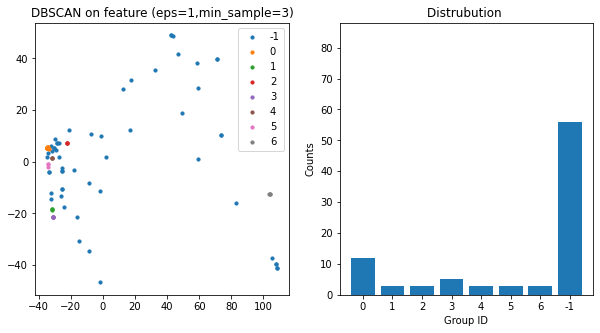

In [41]:
# scaler = StandardScaler().fit(X_pca_n2)
# X_pca_n2_s= scaler.transform(X_pca_n2)

# scaler = StandardScaler().fit(X_pca_n3)
# X_pca_n3_s= scaler.transform(X_pca_n3)

DBSCAN_PCA_result=DBSCAN_draw(X_pca_n2,eps=1,min_sample=3)
# DBSCAN_PCA_result=DBSCAN_draw(X_pca_n2_s,eps=1,min_sample=3)
# DBSCAN_PCA_result=DBSCAN_draw(X_pca_n3,eps=1,min_sample=3)
# DBSCAN_PCA_result=DBSCAN_draw(X_pca_n3_s,eps=1,min_sample=3)


## Kmeans

In [21]:
def Kmeans_draw(data,n_clusters, print_group_info=True,draw=True):
    """
    data :            要進行clustering 的np array 
    n_clusters :      Kmeans要分幾群
    print_group_info: Bool,是否要顯示每個分群中資料的筆數
    draw:             Bool,是否要畫圖
    return :          Kmeans 結果
    """
    clustering = cluster.KMeans(n_clusters = n_clusters).fit(data)
    label=list(clustering.labels_)
    group_list=[]
    count_list=[]
    fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    
    if print_group_info==True:
        for i in set(label):
            print("label:",i,"\tcount:",label.count(i))
            group_list.append(str(i))
            count_list.append(label.count(i))
        ax2.bar(group_list,count_list)
        ax2.set_title(f"Distrubution ")
        ax2.set_xlabel('Group ID')
        ax2.set_ylabel('Counts')
    
    if draw==True:
        group =clustering.labels_
        # fig, ax = plt.subplots()
        for g in np.unique(group):
            ix = np.where(group == g)
            ax1.scatter(data[:,0][ix], data[:,1][ix], label = g, s = 10)
        ax1.legend()
        ax1.set_title(f"Kmeans on feature (n_clusters={n_clusters})")
        # fig.show()
   
        ax1.legend()
        fig.show()
        plt.savefig(f"img/Kmeans{n_clusters}.jpg")
    return clustering

label: 0 	count: 63
label: 1 	count: 16
label: 2 	count: 9
label: 0 	count: 13
label: 1 	count: 40
label: 2 	count: 9
label: 3 	count: 6
label: 4 	count: 20
label: 0 	count: 40
label: 1 	count: 7
label: 2 	count: 6
label: 3 	count: 5
label: 4 	count: 6
label: 5 	count: 6
label: 6 	count: 4
label: 7 	count: 14


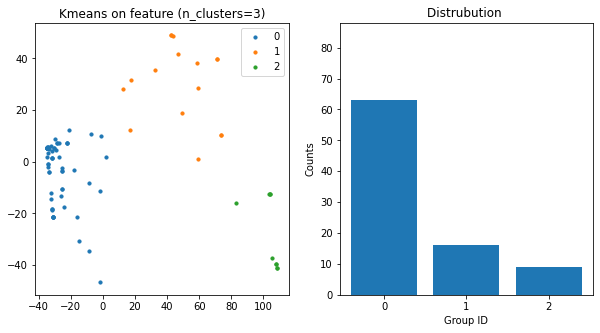

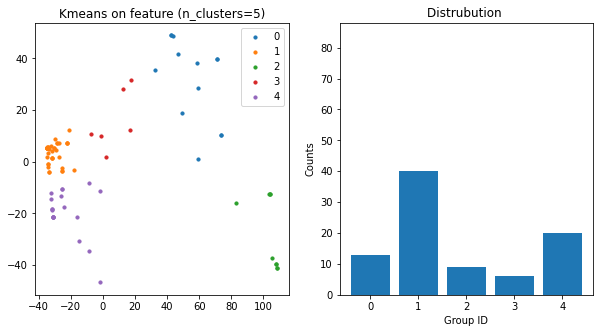

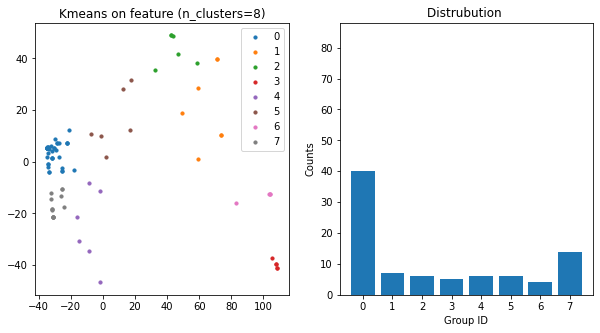

In [25]:
# for i in [3,5,8]:
Kmeans_result=Kmeans_draw(X_pca_n2,n_clusters=i)

# 將label 結果儲存
- 將分群結果儲存
    - 需要使用讀檔的`label_encoding.csv`來取出feature對應的label


In [365]:
DBSCAN_lebals=DBSCAN_draw(X_pca_n2,eps=5,min_sample=3,print_group_info=False,draw=False).labels_
Kmeans_lebals=Kmeans_draw(X_pca_n2,n_clusters=3,print_group_info=False,draw=False).labels_
label_data=list(pd.read_csv('label_encoding.csv').columns).remove('item_id')  #取出feature對應的label
res=pd.DataFrame()
res['label']=label_data
res['DBSCAN']=DBSCAN_lebals
res['Kmeans']=Kmeans_lebals

res.to_csv("cluster_on_item.csv")